## Задача 1
Построить модель линейной регрессии.
- линейная модель
- полином второй степени
- полином третьей степени
- экспонента 


Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки. 
- Посчитать MSE для каждого случая
- Выбрать наилучший вариант (без тестовой выборки)


Для решения можете использовать np.linalg.lstsq, np.polyfit, np.poly1d, scipy.stats.linregress, scipy.optimize.curve_fit, sklearn.linear_model.LinearRegression, statsmodels, np.linalg.solve (аналитически) или с помощью стохастического градиентного спуска (написать самостоятельно).

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [69]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

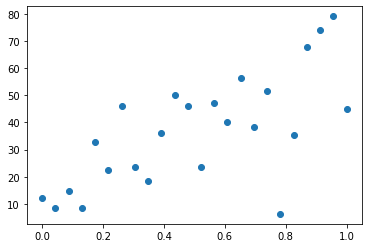

In [70]:
plt.scatter(x, y);

### Линейная модель

In [71]:
X1 = list(zip(np.ones(24), x))

In [72]:
W1 = np.linalg.lstsq(X1, y, rcond=None)[0]

In [73]:
def f1(x, w): 
    return w[0] + w[1]*x

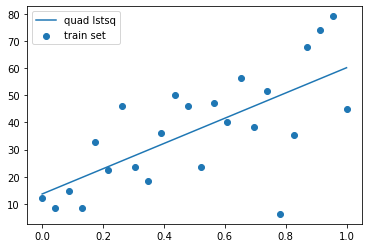

In [74]:
plt.scatter(x, y, label='train set')
plt.plot(x, f1(x, W1), label='quad lstsq')
plt.legend();

In [75]:
mean_squared_error(y, f1(x, W1))

213.13469863888886

### Полином второй степени

In [76]:
X2 = list(zip(np.ones(24), x, x*x))

In [77]:
W2 = np.linalg.lstsq(X2, y, rcond=None)[0]

In [78]:
def f2(x, w): 
    return w[0] + w[1]*x + w[2]*x*x

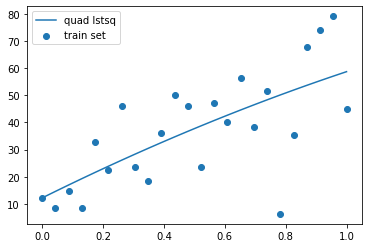

In [79]:
plt.scatter(x, y, label='train set')
plt.plot(x, f2(x, W2), label='quad lstsq')
plt.legend();

In [80]:
mean_squared_error(y, f2(x, W2))

212.59353678557318

### Полином третьей степени

In [81]:
X3 = list(zip(np.ones(24), x, x*x, x*x*x))

In [82]:
W3 = np.linalg.lstsq(X3, y, rcond=None)[0]

In [83]:
def f3(x, w): 
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x*x*x

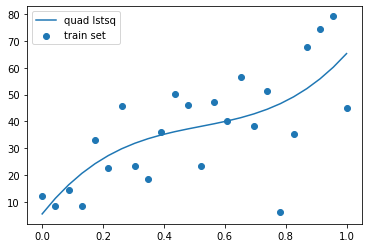

In [84]:
plt.scatter(x, y, label='train set')
plt.plot(x, f3(x, W3), label='quad lstsq')
plt.legend();

In [85]:
mean_squared_error(y, f3(x, W3))

202.51303659090914

### Экспонента

In [86]:
from scipy.optimize import curve_fit

In [87]:
def f_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

In [88]:
popt, pcov = curve_fit(f_exp, x, y, maxfev=5000)

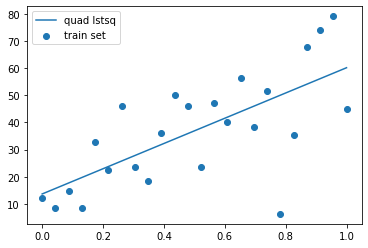

In [89]:
plt.scatter(x, y, label='train set')
plt.plot(x, f_exp(x, *popt), label='quad lstsq')
plt.legend();

In [90]:
mean_squared_error(y, f_exp(x, *popt))

213.1383582968513

In [91]:
mse = {
   'Линейная': mean_squared_error(y, f1(x, W1)),
   'Полином второй степени': mean_squared_error(y, f2(x, W2)),
   'Полином третьей степени': mean_squared_error(y, f3(x, W3)),
   'Экспонента': mean_squared_error(y, f_exp(x, *popt))
}

In [92]:
print(f"Минимальная MSE = {min(mse.values())} у модели: {list(mse.keys())[list(mse.values()).index(min(mse.values()))]}")

Минимальная MSE = 202.51303659090914 у модели: Полином третьей степени
